
[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Dataset Shape: (319, 39)
Columns: Index(['Gallstone Status', 'Age', 'Gender', 'Comorbidity',
       'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia',
       'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)',
       'Total Body Water (TBW)', 'Extracellular Water (ECW)',
       'Intracellular Water (ICW)',
       'Extracellular Fluid/Total Body Water (ECF/TBW)',
       'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)',
       'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)',
       'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)',
       'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)',
       'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)',
       'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)',
       'High Density Lipoprotein (HDL)', 'Triglyceride',
       'As

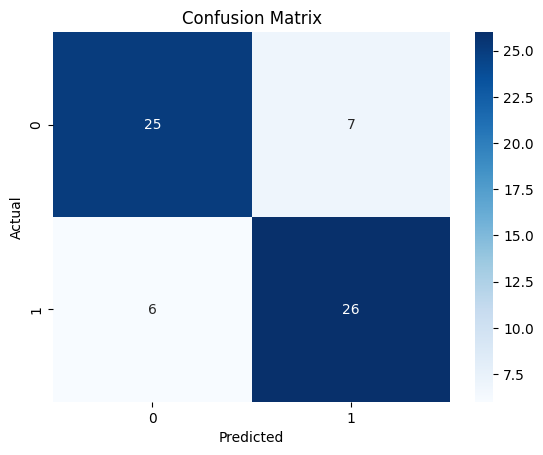

ROC AUC Score: 0.873046875


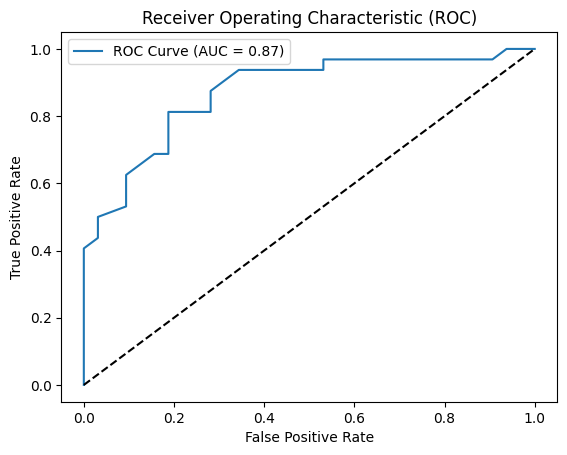

['models/scaler.pkl']

In [2]:
!pip install seaborn
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import os # Import the os module

# Load dataset
data = pd.read_csv("C:/Users/Kavya/OneDrive/Desktop/Contributions/Data_Scientist/DataSentience-AIML/Health AI/DiseasePrediction_XAI/dataset-uci.csv")

# Show basic info
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print("Missing Values:\n", data.isnull().sum())
print("First 5 Rows:\n", data.head())

# ====== STEP 1: Data Preprocessing ======

# Fill missing values if any (here using median)
data = data.fillna(data.median(numeric_only=True))

# Define Features and Target
X = data.drop(['Gallstone Status'], axis=1)   # Assuming 'Outcome' is the target column
y = data['Gallstone Status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ====== STEP 2: Model Building ======

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ====== STEP 3: Model Evaluation ======

# Accuracy, Precision, Recall, F1 Score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save model and scaler
joblib.dump(model, 'models/random_forest_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')